<a href="https://colab.research.google.com/github/dee-ah-nuh/Stroke/blob/main/Stroke%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import seaborn as sns

In [43]:
stroke = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Bootcamp/Project 2 /healthcare-dataset-stroke-data.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Bootcamp/Project 2 /healthcare-dataset-stroke-data.csv')
stroke.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
77     Female  13.0  0             0              No            children       Rural           85.81              18.6  Unknown          0         1
49605  Male    63.0  0             0              Yes           Private        Urban           74.39              31.0  formerly smoked  0         1
49661  Male    53.0  0             0              Yes           Govt_job       Urban           85.17              29.2  never smoked     0         1
49646  Male    72.0  0             1              Yes           Self-employed  Rural           113.63             26.5  Unknown          0         1
49645  Male    58.0  0             0              No            Private        Rural           76.22              22.2  formerly smoked  0         1
                                                                                                               

1. Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)


2. The Data includes statistics of patients who have had a stroke, stroke-like symptoms, and no stroke to determine weather we can predcit someone can have a stroke depending on the other features like bmi, height, weight, age, gender, diseases, etc...

3. Target = Stroke (or not)

4. Classification problem =  whether player has a stroke or not

5&6. There are around 12 features and around 8K rows of data

7. I belive that this dataset is the perfect balance between complex and simplistic allowing for easy predictions and modeling. 

In [6]:
#getting a value of all NaN or Missing
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#Getting all the duplicated values
stroke.duplicated().sum()

0

In [8]:
#Checking the column 'bmi' because it was the only one contaning missing values
stroke['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [9]:
#stroke.drop(stroke.loc[stroke['gender']== 'Other'].index, inplace=True)
#stroke = stroke[stroke.'gender' != 'Other']
stroke = stroke[stroke["gender"].str.contains("Other") == False]

In [42]:
nominal_selector = stroke.select_dtypes( include='object')
for col in nominal_selector.columns:
  print(col)
  print(nominal_selector[col].value_counts(), '\n')

ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64 

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64 



In [123]:
stroke['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [45]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


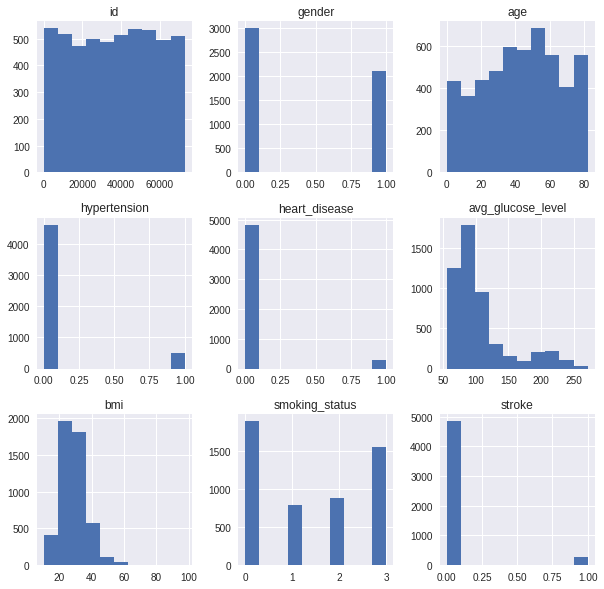

In [38]:
Stroke_graph = stroke.hist(figsize = (10,10))

Average Glucose level is one of the few abnormla distributions - this one is skewed to the right. BMI is also a histogram that poses a slight skew to the right. Stroke, Heart Disease and Hypertension are all bimodal since the columns are 

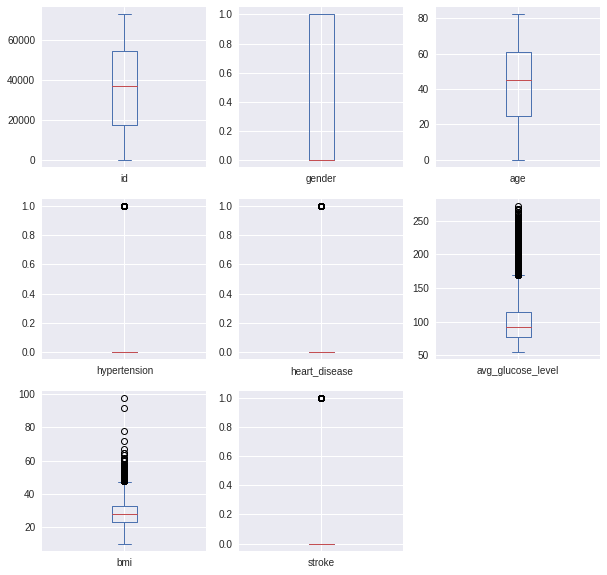

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
stroke.plot(kind='box',subplots=True ,layout=(3,3),sharex=False , sharey=False , figsize =(10,10))
plt.show()

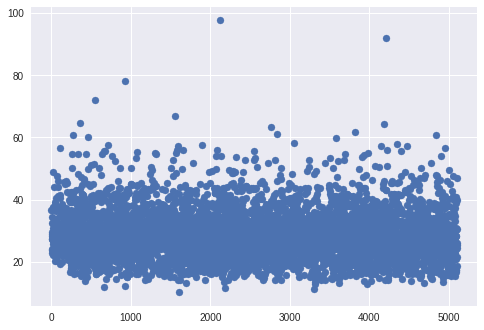

In [18]:
plt.scatter(stroke.index, stroke['bmi'])
plt.show()

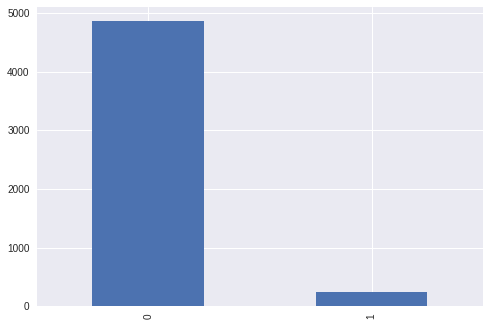

In [19]:
stroke['stroke'].value_counts().plot(kind='bar')

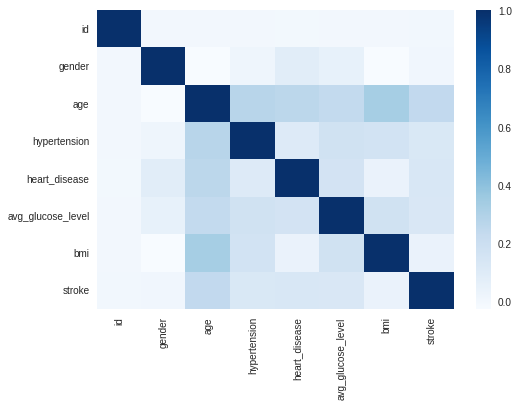

In [20]:
#Creating a correlation map to show moderate to strong correlations between target features and other columns
corr = stroke.corr()
sns.heatmap(corr, cmap = 'Blues')

In [21]:
#Creating a filter to select all columns that are non-numerical so we can correct for inconsistencies
nominal_selector = stroke.select_dtypes(include='object')
for col in nominal_selector.columns:
  print(col)
  print(nominal_selector[col].value_counts(), '\n');

ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64 

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64 



Validation Split - Classification Problem

In [22]:
#Assigning and splitting target column to X and y with random state of 42

In [23]:
X=stroke.drop(columns='stroke')
y = stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
nominal_selector = make_column_selector(dtype_include='object')
numeric_selector = make_column_selector(dtype_include='number')

In [25]:
#Creating our imputer for later inputing them into our preprocessor and pipeline

In [26]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='Missing')

In [27]:
nominal_pipeline = make_pipeline(missing_imputer, ohe)
numeric_pipeline = make_pipeline(mean_imputer, scaler)

In [28]:
nominal_tup = (nominal_pipeline, (['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']))
numeric_tup = (numeric_pipeline, numeric_selector)

In [29]:
preprocessor = make_column_transformer(numeric_tup, nominal_tup, remainder='passthrough')

In [30]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2ccce675d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=Fal

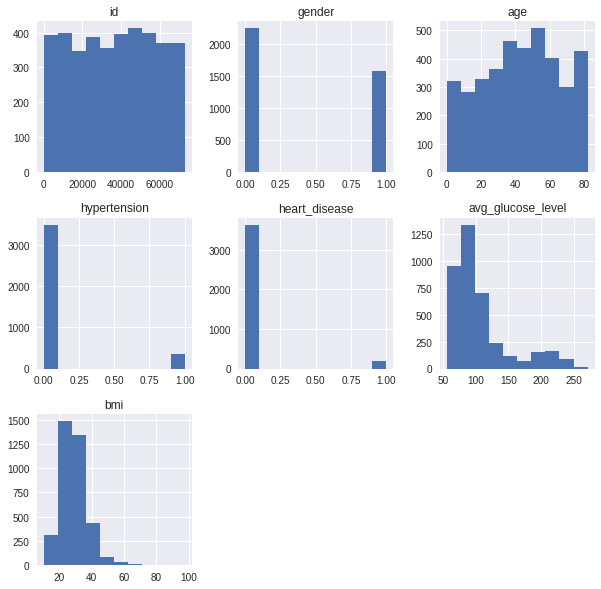

In [44]:
Stroke_graph2 = X_train.hist(figsize = (10,10))

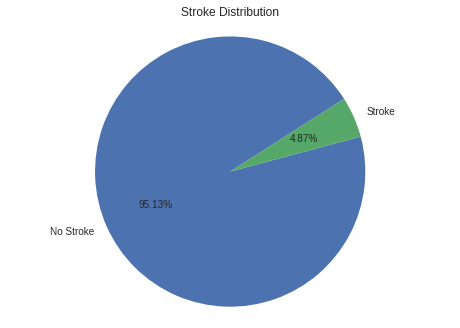

In [136]:
stroke_answer = stroke['stroke'].value_counts()
stroke_label = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(stroke_answer, labels=stroke_label, autopct='%1.2f%%',
        shadow=False, startangle=15, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Stroke Distribution')
plt.show()

The number of people who have suffered from stroke are very minimal compared to those who have had a stroke. 

In [31]:
#importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
#Creating a function to evaluate metrics towards prediction

def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize=None, classes=None, figsize=(20,5)):
  """Takes as arguments: a model, features, and labels
  Prints a classification report, confusion matrix
  Optional arguments: 
    cmap: colormap 
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure"""
    
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize)
  plt.show()

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 479.0+ KB


In [52]:
#new libraries

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [67]:
#Clustering 
df.dropna(inplace=True)
x = df[['age','avg_glucose_level', 'bmi']]

x.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
5,81.0,186.21,29.0


In [68]:
x.describe()

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


In [69]:
scaled_x = StandardScaler().fit_transform(x)
scaled_x[:5]

array([[ 1.07013796,  2.77769839,  0.98134488],
       [ 1.64656262,  0.0138418 ,  0.45926914],
       [ 0.27201152,  1.48413156,  0.70120668],
       [ 1.60222226,  1.54919261, -0.62308299],
       [ 1.69090297,  1.82136844,  0.01359474]])

In [70]:
ks = range(2,10)
inertia = []

for k in ks:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(scaled_x)
  inertia.append(model.inertia_)

Text(0, 0.5, 'inertias')

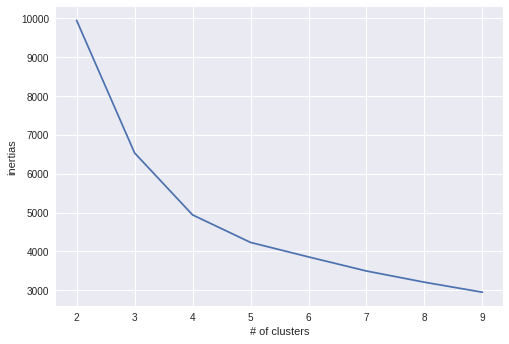

In [71]:
plt.plot(ks, inertia)
plt.xlabel('# of clusters')
plt.ylabel('inertias')

In [72]:
ks = range(2,10)
sills = []

for k in ks:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(scaled_x)
  sills.append(silhouette_score(scaled_x, model.labels_))

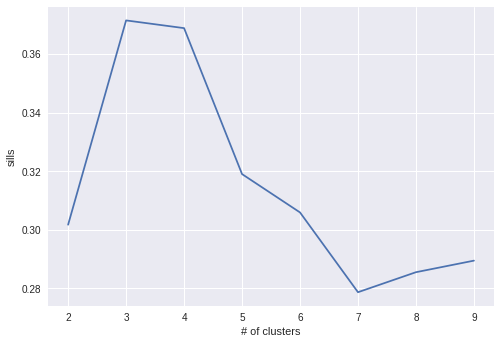

In [73]:
plt.plot(ks, sills)
plt.xlabel('# of clusters')
plt.ylabel('sills')
plt.show()

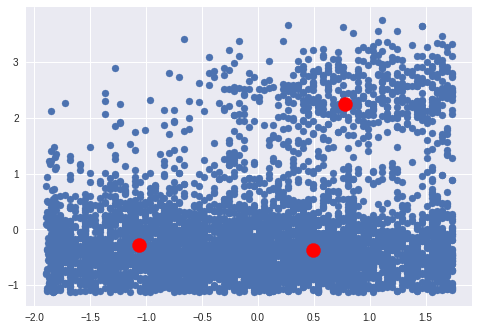

In [95]:
#opitmal ~ 3 
best_model = KMeans(n_clusters=3, random_state=42)
y_preds = best_model.fit(scaled_x)
plt.scatter(scaled_x[:,0], 
            scaled_x[:,1])
plt.scatter(best_model.cluster_centers_[:, 0], 
            best_model.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In this graph we can see the centroids and the various clusteres mapped upon age, bmi and average glucose level. We can see in the Elbow and the Intertia plot that the highest and optimal number of cluster to groups the people in tihs dataset was 3 as represented inn the scatterplot above. 

In [75]:
cluster_df = df.copy()
cluster_df['cluster'] = best_model.labels_
cluster_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,1
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0


In [78]:
cluster_groups = cluster_df.groupby('bmi', as_index=False)
cluster_mean = cluster_groups.mean()
print(cluster_mean)


      bmi       id    age  hypertension  heart_disease  avg_glucose_level  \
0    10.3  38043.0   1.24           0.0            0.0             122.04   
1    11.3   3205.0  79.00           0.0            0.0              79.03   
2    11.5  59993.0  40.00           0.0            0.0              60.96   
3    12.0  20364.0   4.00           0.0            0.0             107.25   
4    12.3  45893.0   8.00           0.0            0.0             106.51   
..    ...      ...    ...           ...            ...                ...   
413  66.8  37759.0  53.00           0.0            0.0              72.63   
414  71.9    545.0  42.00           0.0            0.0             210.48   
415  78.0  41097.0  23.00           1.0            0.0              70.03   
416  92.0  51856.0  38.00           1.0            0.0              56.90   
417  97.6  56420.0  17.00           1.0            0.0              61.67   

     stroke  cluster  
0       0.0      1.0  
1       0.0      1.0  
2     

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cc5647b90>,
      dtype=object)

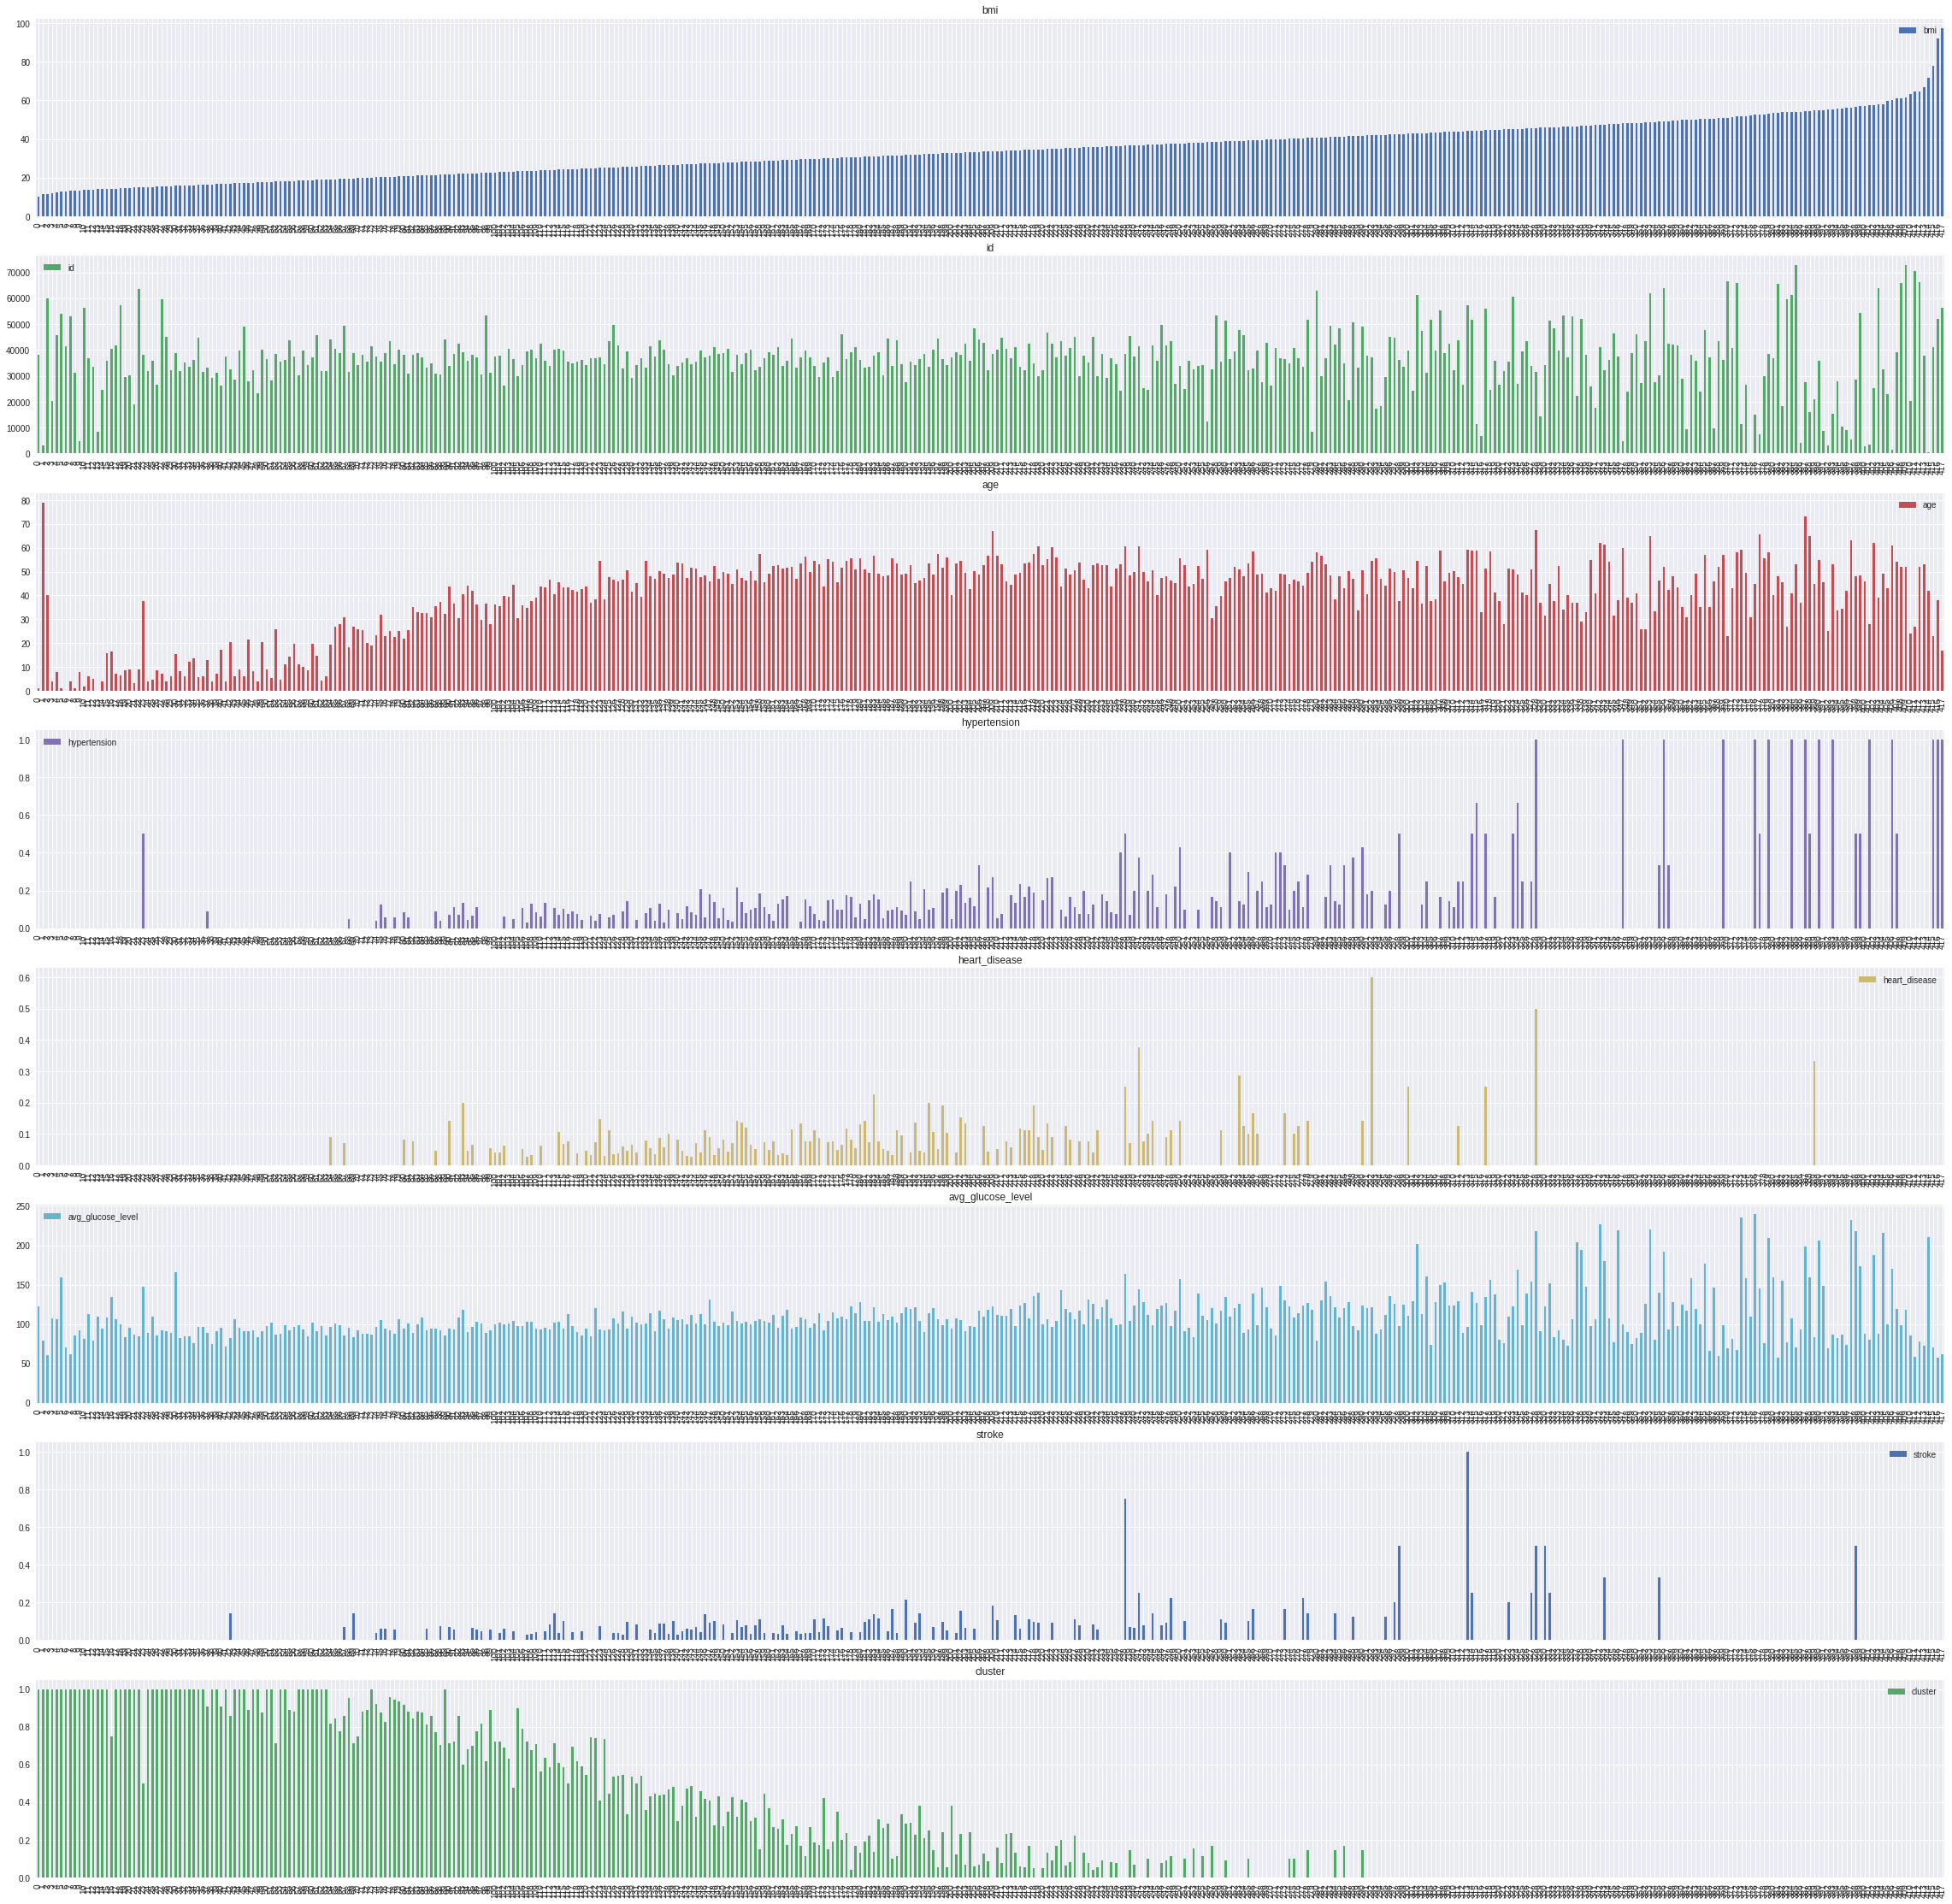

In [124]:
cluster_mean.plot(subplots=True, kind='bar', figsize= (40, 40), sharex=False)


In [111]:
from sklearn.linear_model import LogisticRegression

In [113]:
logreg = LogisticRegression()
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2ccce675d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
     

In [114]:
print(f'Training Score:', logreg_pipe.score(X_train, y_train))
print(f' Testing Score:', logreg_pipe.score(X_test, y_test))

Training Score: 0.9558861915948839
 Testing Score: 0.9381846635367762


In [117]:
#L1 Tunning
c_valuesl1 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scoresl1 = []
test_scoresl1 = []
for c in c_valuesl1: 
  logregl1 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  logregl1_pipe = make_pipeline(preprocessor, logregl1)
  logregl1_pipe.fit(X_train, y_train)
  train_scoresl1.append(logregl1_pipe.score(X_train, y_train))
  test_scoresl1.append(logregl1_pipe.score(X_test, y_test))
{c:score for c, score in zip(c_valuesl1, test_scoresl1)}

{0.0001: 0.9374021909233177,
 0.001: 0.9374021909233177,
 0.01: 0.9374021909233177,
 0.1: 0.9374021909233177,
 1: 0.9381846635367762,
 10: 0.9381846635367762,
 100: 0.9381846635367762,
 1000: 0.9381846635367762}

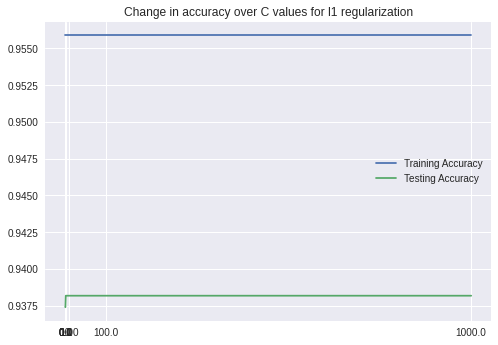

In [122]:
fig, ax = plt.subplots(1,1)
ax.plot(c_valuesl1, train_scoresl1, label='Training Accuracy')
ax.plot(c_valuesl1, test_scoresl1, label='Testing Accuracy')
ax.set_xticks(c_valuesl1)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

In [119]:
#L2 Tunning
c_values2 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores2 = []
test_scores2 = []
for c in c_values2: 
  logreg_l2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  logreg_l2_pipe = make_pipeline(preprocessor, logreg)
  logreg_l2_pipe.fit(X_train, y_train)

  train_scores2.append(logreg_l2_pipe.score(X_train, y_train))
  test_scores2.append(logreg_l2_pipe.score(X_test, y_test))

{c:score for c, score in zip(c_values2, test_scores2)}

{0.0001: 0.9381846635367762,
 0.001: 0.9381846635367762,
 0.01: 0.9381846635367762,
 0.1: 0.9381846635367762,
 1: 0.9381846635367762,
 10: 0.9381846635367762,
 100: 0.9381846635367762,
 1000: 0.9381846635367762}

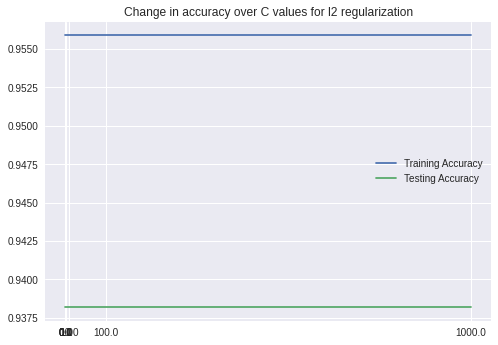

In [120]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values2, train_scores2, label='Training Accuracy')
ax.plot(c_values2, test_scores2, label='Testing Accuracy')
ax.set_xticks(c_values2)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()